In [1]:
from __future__ import division
from neuron import h
from neuron import gui
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

## creating cell object

In [2]:
h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("models/L5PCbiophys3.hoc")
h.load_file("models/L5PCtemplate.hoc")
L5PC = h.L5PCtemplate(morphology_file)

## stimulus settings

In [3]:
stim = h.IClamp(L5PC.soma[0](0.5))
stim.dur   = 1000
stim.delay = 400
stim.amp   = 0.793

## recording settings

In [4]:
t = h.Vector()
t.record(h._ref_t)

soma_v = h.Vector()
soma_v.record(L5PC.soma[0](0.5)._ref_v)

nexus_v = h.Vector()
nexus_v.record(L5PC.apic[36](0.9)._ref_v)

stim_current = h.Vector()
stim_current.record(stim._ref_i);

# run simulation

In [5]:
h.v_init = -80
h.tstop = 1500
h.celsius = 37
h.run();

# plotting

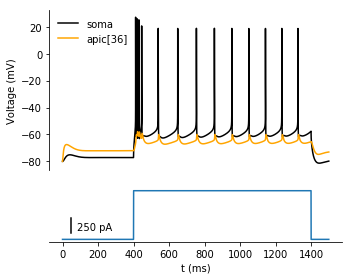

In [6]:
f, (ax0, ax1) = plt.subplots(2,1, figsize=(5,4), gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(t,soma_v, 'k', label = 'soma')
ax0.plot(t,nexus_v, 'orange', label = 'apic[36]')
ax0.legend(frameon=False)
ax1.plot(t,stim_current)

ax0.set_ylabel('Voltage (mV)')
#ax0.set_ylim(-80,20)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)


ax1.plot([50,50],[0.1,0.35],'k')
ax1.text(80,0.2,'250 pA',va='center')
ax1.set_ylabel('I (nA)')
ax1.set_xlabel('t (ms)')
#ax1.set_ylim(-0.01,0.02)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.tight_layout()